# This is a MultiClass Classification Problem

We are given a dataset of 65 features (1 categorical & 64 continuous) and 1 target variable having 4 classes which makes it a multiclass classification problem.

Let us begin by importing important libraries

In [17]:
import pandas as pd 
import numpy as np
pd.options.display.max_rows = 200
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [18]:
train = pd.read_csv("train.csv", header= None) #import training data
test = pd.read_csv("test.csv", header= None) #import test data
test.fillna(0, inplace=True) #filling any missing value with 0 in test dataset

# Visualizing & Processing Data

In [19]:
train.isnull().sum() # No missing values

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
59    0
60    0
61    0
62    0
63    0
64    0
65    0
dtype: int64

In [20]:
traindata= train.copy()
testdata = test.copy()
traindata.drop(traindata.columns[[65]], axis = 1, inplace = True) #dropping target variable
testdata.drop(testdata.columns[[65]], axis = 1, inplace = True) #dropping target variable

Let's check for the variance within each feature to reduce dimensions. The feature which has lower variance compared to other features will be dropped. As they are not varying much, they are of little or no use for our model

In [21]:
#add var show not much to reduce

Now let us check for the correlations between the features. If features are correlated, we will keep one of those as they have a similiar effect. In this way we will reduce our dimensions.

In [22]:
Corr = traindata.corr() #correlation between variables
for i in range(len(Corr.columns)):
    print(Corr[(Corr[i]>0.5) & (Corr[i]<1.0)].index) 
        # returns index having correlation greater than 5
        # Col 2 & 3, Col 4 & 5, Col 11 & 10, Col 19 & 18, Col 21 & 20, Col 29 & 28
        # Col 35 & 34, Col 45 & 44, Col 59 & 58,  Col 61 & 60 are correlated. Drop one of them

traindata.drop(traindata.columns[[2,4,11,19,21,29,35,45,59,61]], axis = 1, inplace = True)  
testdata.drop(testdata.columns[[2,4,11,19,21,29,35,45,59,61]], axis = 1, inplace = True)

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([3], dtype='int64')
Int64Index([2], dtype='int64')
Int64Index([5], dtype='int64')
Int64Index([4], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([11], dtype='int64')
Int64Index([10], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([19], dtype='int64')
Int64Index([18], dtype='int64')
Int64Index([21], dtype='int64')
Int64Index([20], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([29], dtype='int64')
Int64Index([28], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype

We will now convert a categorical variable which is the column 64 into one hot encoding for our machine learning libraries to process

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
data=traindata.copy()
#FOR TRAIN DATA
integer_encoded = number.fit_transform(data[64])
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
for x in range(0,np.shape(onehot_encoded)[1]):
    data['64'+str(x)]= onehot_encoded[:,x]

Now that variables are ready to be processed by scikit library, we will use RandomForestRegressor to extract important features from our dataset.

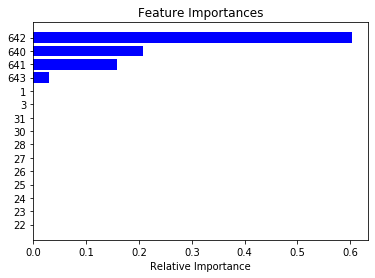

In [24]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1, max_depth=100)
data.drop(data[[64]],axis=1, inplace = True)  
df=pd.get_dummies(data)
model.fit(df,train[[65]])
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-15:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
#It is interesting that it only depends on 64th column feature and also seeing that each value of 64th column
#is mapped to a different class. Therefore it brings in a lot of biasness in the data. So we are going to remove it 
#and check the important features again

It is interesting that it only depends on 64th column feature and also seeing that each value of 64th columnis mapped to a different class. Therefore it brings in a lot of biasness in the data. So we are going to remove it and check the important features again

In [25]:
traindata.drop(traindata[[64]],axis=1, inplace = True)  
testdata.drop(testdata[[64]],axis=1, inplace = True)  

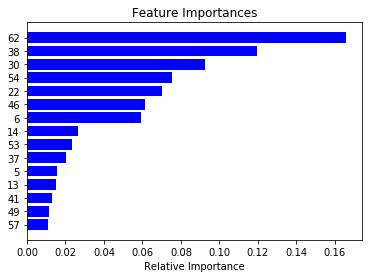

In [26]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1, max_depth=100)
df=pd.get_dummies(traindata)
model.fit(df,train[[65]])
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-15:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

We can clearly see now the top 15 features that are important for our model. Let us use these features and train the model

# Fitting into the model

I will be using decision tree for the classification and we will try to optimize the accuracy changing the parameters of decision tree function from scikit library

In [27]:
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix  
model = tree.DecisionTreeClassifier(criterion='gini', max_depth=7)
model.fit(traindata[[62,38,30,54,22,46,6,14,53,37,5,13,41,49,57]],train[[65]])
predicted= model.predict(testdata[[62,38,30,54,22,46,6,14,53,37,5,13,41,49,57]])
matrix = confusion_matrix(test[[65]], predicted)
print(matrix)
report = classification_report(test[[65]], predicted)
print(report)

[[603  11  28  70]
 [  0 686  40  51]
 [ 15 156 473 133]
 [ 24 238  37 435]]
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       712
           1       0.63      0.88      0.73       777
           2       0.82      0.61      0.70       777
           3       0.63      0.59      0.61       734

    accuracy                           0.73      3000
   macro avg       0.75      0.73      0.73      3000
weighted avg       0.75      0.73      0.73      3000



The confusion matrix shows that the model is classifying better for the 0 class as opposed to the other class. Let us iterate over the max_depth parameter and let's see what we get.

No handles with labels found to put in legend.


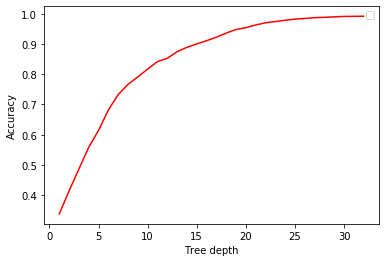

In [28]:
from sklearn.metrics import accuracy_score
results=accuracy_score(test[[65]], predicted)
test_results = []
max_depths = np.linspace(1, 32, 32, endpoint=True)
for max_depth in max_depths:
    model = tree.DecisionTreeClassifier(criterion='gini', max_depth=max_depth)
    model.fit(traindata[[62,38,30,54,22,46,6,14,53,37,5,13,41,49,57]],train[[65]])
    predicted= model.predict(testdata[[62,38,30,54,22,46,6,14,53,37,5,13,41,49,57]])
    test_results.append(accuracy_score(test[[65]], predicted))
    
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
%matplotlib inline
line2, = plt.plot(max_depths, test_results, 'r')
plt.legend(handler_map={line2: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

So max_depth between 25 and 30 would give us a good accurace score. Let's test this and see the confusion matrix

In [29]:
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix  
model = tree.DecisionTreeClassifier(criterion='gini', max_depth=30)
model.fit(traindata[[62,38,30,54,22,46,6,14,53,37,5,13,41,49,57]],train[[65]])
predicted= model.predict(testdata[[62,38,30,54,22,46,6,14,53,37,5,13,41,49,57]])
matrix = confusion_matrix(test[[65]], predicted)
print(matrix)
report = classification_report(test[[65]], predicted)
print(report)

[[712   0   0   0]
 [  0 777   0   0]
 [  0  12 764   1]
 [  0  13   1 720]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       712
           1       0.97      1.00      0.98       777
           2       1.00      0.98      0.99       777
           3       1.00      0.98      0.99       734

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



There we go we have built a good model with the accuracy of 99%.